In [1]:
import glob
import os.path

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


from sklearn import datasets, linear_model, ensemble, neural_network
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from pathlib import Path

In [2]:
# Use this for larger plots:
#matplotlib.rc('figure', figsize=(15, 10))
matplotlib.rc('figure', figsize=(10, 8))

<div style="text-align:center">
<h1>xarray</h1>

<br><br>
<img src="xarray-logo.png" style="width: 50%; margin: auto;">
</div>

In [3]:
COUNTRIES = 'Austria', 'Germany', 'Switzerland', 'Italy', 'Spain', 'Sweden', 'United Kingdom'

# From previous lecture...

In [4]:
CONFIG_FILE = '../entsoe-data.config'

if not os.path.exists(CONFIG_FILE):
    download_dir = input('Path to ENTSO-E data folder: ')
    if not os.path.isdir(download_dir):
        raise RuntimeError(f'Invalid download_dir, please run cell again: {download_dir}')
    with open(CONFIG_FILE, 'w') as f:
        f.write(download_dir)
else:
    with open(CONFIG_FILE) as f:
        download_dir = f.read()
        
# Clear the output after this cell if you want to aovid having your path in the notebook (or execute it twice)!

In [5]:
def read_single_csv_entso_e(file):
    return pd.read_csv(file, sep='\t', encoding='utf-16', parse_dates=["DateTime"])


def load_complete_entso_e_data(directory):
    pattern = Path(directory) / '*.csv'
    files = glob.glob(str(pattern))

    if not files:
        raise ValueError(f"No files found when searching in {pattern}, wrong directory?")
    
    print(f'Concatenating {len(files)} csv files...')

    each_csv_file = [read_single_csv_entso_e(file) for file in files]
    data = pd.concat(each_csv_file, ignore_index=True)

    data = data.sort_values(by=["AreaName", "DateTime"])
    data = data.set_index("DateTime")

    print("Loading done.")

    return data


power_demand = load_complete_entso_e_data(download_dir)

Concatenating 68 csv files...
Loading done.


In [6]:
def get_hourly_country_data(data, country):
    ret_data = data[data["AreaName"] == country].interpolate()
    #ret_data = ret_data.set_index("DateTime")
    ret_data = ret_data.resample("1h").mean().interpolate()
    return ret_data

# Temperature data

ERA5 data is provided as NetCDF file. The library `xarray` comes in very handy to load such files.

In [7]:
import xarray as xr

In [8]:
temperatures_dataset = xr.load_dataset('../data/temperatures_era5.nc')

In [9]:
temperatures_dataset

<xarray.Dataset>
Dimensions:    (latitude: 70, longitude: 77, time: 41545)
Coordinates:
  * longitude  (longitude) float32 -13.5 -13.0 -12.5 -12.0 ... 23.5 24.0 24.5
  * latitude   (latitude) float32 70.0 69.5 69.0 68.5 ... 37.0 36.5 36.0 35.5
  * time       (time) datetime64[ns] 2015-01-01 ... 2020-03-01
Data variables:
    t2m        (time, latitude, longitude) float32 nan nan nan ... 279.82037 nan
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-26 16:53:49 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [10]:
temperatures = temperatures_dataset.t2m

In [11]:
temperatures

<xarray.DataArray 't2m' (time: 41545, latitude: 70, longitude: 77)>
array([[[      nan,       nan,       nan, ..., 271.84814, 270.50635,
         269.94232],
        [      nan,       nan,       nan, ..., 272.182  , 271.88733,
         271.63693],
        [      nan,       nan,       nan, ..., 271.85825, 271.62936,
         271.83676],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan, 281.32657,
               nan]],

       [[      nan,       nan,       nan, ..., 271.8418 , 270.56958,
         270.0751 ],
        [      nan,       nan,       nan, ..., 272.16302, 271.9354 ,
         271.6496 ],
        [      nan,       nan,       nan, ..., 272.12256, 271.77478,
         271.87216],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan, 281.20264,
               nan]],

       [[      nan,       nan,       nan, ..., 271.81778, 270.62778,
         270.09662],
        [      nan,       nan,       nan, ..., 272.22372, 272.0214 ,
         271.60278],
        [      nan,       nan,       nan, ..., 272.5892 , 272.1668 ,
         272.08716],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan, 281.09766,
               nan]],

       ...,

       [[      nan,       nan,       nan, ..., 263.088  , 262.6062 ,
         261.88535],
        [      nan,       nan,       nan, ..., 263.00076, 261.9258 ,
         260.74844],
        [      nan,       nan,       nan, ..., 260.8749 , 260.1705 ,
         259.99597],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan, 280.13654,
               nan]],

       [[      nan,       nan,       nan, ..., 263.2208 , 262.8275 ,
         262.1193 ],
        [      nan,       nan,       nan, ..., 263.1234 , 261.9878 ,
         260.90652],
        [      nan,       nan,       nan, ..., 260.96597, 260.22867,
         260.13635],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan, 279.68887,
               nan]],

       [[      nan,       nan,       nan, ..., 262.9527 , 262.8629 ,
         262.2015 ],
        [      nan,       nan,       nan, ..., 263.1209 , 261.93973,
         260.76108],
        [      nan,       nan,       nan, ..., 260.90778, 259.9201 ,
         259.6621 ],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan, 279.82037,
               nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -13.5 -13.0 -12.5 -12.0 ... 23.5 24.0 24.5
  * latitude   (latitude) float32 70.0 69.5 69.0 68.5 ... 37.0 36.5 36.0 35.5
  * time       (time) datetime64[ns] 2015-01-01 ... 2020-03-01
Attributes:
    units:      K
    long_name:  2 metre temperature

Oh there are NaN values? How many of them?

In [12]:
total_size = temperatures.sizes['time'] * temperatures.sizes['latitude'] * temperatures.sizes['longitude']
float(np.isnan(temperatures).sum() / total_size)

0.5575139146567718

Uh 55% of missing values.. That's not good! What could that be?

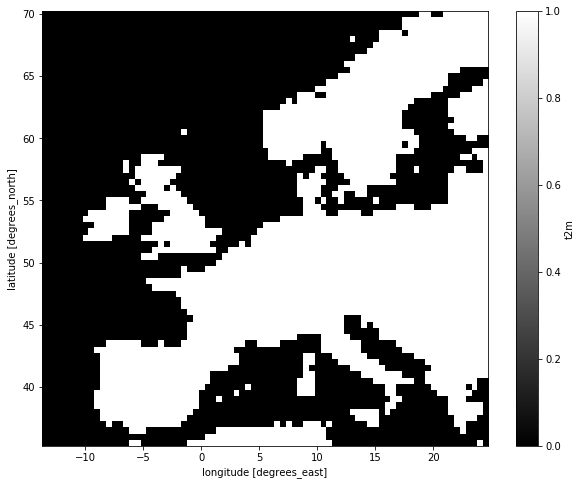

In [13]:
(~np.isnan(temperatures)).prod(dim='time').plot.imshow(cmap='gray')

# Exercise 1

Plot the mean temperature for each location!

(There will be a warning because of the NaNs, but that's okay.)

/opt/miniconda3/envs/scientific-computing/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


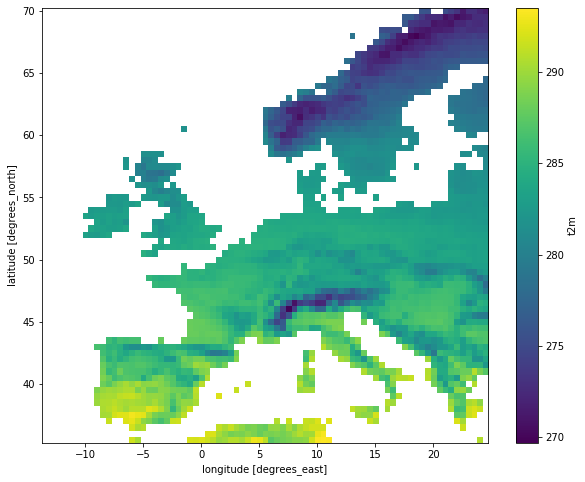

In [14]:
temperatures.mean(dim='time').plot.imshow()

Temperature seems not to be in °C...

In [15]:
temperatures = temperatures - 273.15
temperatures.name = 'Temperature [C°]'

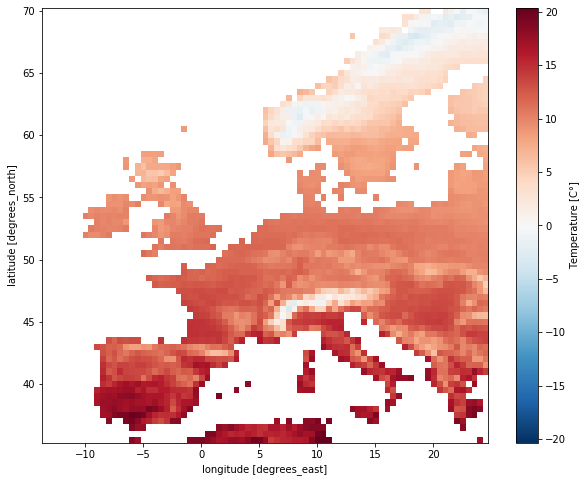

In [16]:
temperatures.mean(dim='time').plot.imshow()

# Mean temperature for each country

As a next step, we want to calculate the mean temperature for each country.

### Pick random grid points to calculate the mean

We'll pick just some random samples from the grid for each country, to make computation of the man faster. The coordinates are already prepared as CSV file, which has been generated using the following code.

In [17]:
def choose_country_points(longitude, latitude, grid_points_per_country=20):
    """Pick random points for each country from the grid with axis ``longitude`` and ``latitude``.
    ``size`` is the number of points ot be picked for 
    
    Returns a dataframe with two columns per country (longitude & latitude)
    and ``grid_points_per_country`` numbers of rows.
    
    Note: GeoJSON always uses WGS84:
    https://tools.ietf.org/html/rfc7946
    
    """
    # local import to avoid dependency
    import geopandas
    from shapely.geometry import Point
    
    longitudes, latitudes = np.meshgrid(longitude, latitude)
    
    longitudes = longitudes.flatten()
    latitudes = latitudes.flatten()
    
    grid_points = geopandas.GeoSeries(geopandas.points_from_xy(longitudes.flatten(),
                                                           latitudes.flatten()))
    
    # XXX fix me, correct path!
    country_borders = geopandas.read_file('../data/countries.geojson')

    chosen_gridpoints = pd.DataFrame()

    for country in COUNTRIES:
        print(f"Picking grid points for {country}...")
        is_country = country_borders.ADMIN == country

        country_border = country_borders[is_country].geometry.iloc[0]

        is_in_country = grid_points.within(country_border)

        number_of_points = is_in_country.sum()
        
        # make things reproducible!
        np.random.seed(42)
        
        idcs = np.random.randint(number_of_points, size=grid_points_per_country)

        chosen_gridpoints[f'{country}_longitude'] = longitudes[is_in_country][idcs]
        chosen_gridpoints[f'{country}_latitude'] = latitudes[is_in_country][idcs]
        
    return chosen_gridpoints

In order to recreate the `country_points.csv` one needs to install `geopandas` and download a `GeoJSON` file (23MB) which contains the country borders:

In [18]:
# !conda install --yes geopandas
# !wget -O ../data/countries.geojson https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson

The following lines create the `country_points.csv`:

In [19]:
# country_points = choose_country_points(temperatures.longitude, temperatures.latitude)
# country_points.to_csv('../data/country_points.csv', index=False)

But since it is already prepared, let's just load it...

In [20]:
country_points = pd.read_csv('../data/country_points.csv')

In [21]:
country_points

,Austria_longitude,Austria_latitude,Germany_longitude,Germany_latitude,Switzerland_longitude,Switzerland_latitude,Italy_longitude,Italy_latitude,Spain_longitude,Spain_latitude,Sweden_longitude,Sweden_latitude,United Kingdom_longitude,United Kingdom_latitude
0,15.5,47.0,13.5,51.0,7.5,47.0,15.0,40.5,-4.0,40.5,16.0,65.0,-4.5,52.0
1,10.0,47.0,8.5,51.0,7.0,46.0,14.0,41.0,-3.0,38.0,12.0,58.0,-2.5,52.5
2,16.0,48.0,9.5,53.5,8.0,46.5,11.5,46.0,-1.5,41.0,18.0,65.0,-4.0,57.5
3,16.5,48.5,7.5,50.5,9.5,47.0,17.5,40.5,-5.0,43.0,17.5,66.0,-2.5,52.0
4,12.5,47.5,7.0,51.5,8.0,47.0,11.5,42.5,-2.0,40.5,16.0,62.0,-1.0,54.0
5,15.5,47.0,12.5,53.5,7.5,46.0,8.5,45.5,-3.0,41.5,16.5,67.5,-5.5,57.0
6,11.5,47.5,13.5,51.0,7.5,47.0,15.0,40.5,-5.0,37.5,16.0,65.0,-4.5,52.0
7,14.0,47.5,8.0,50.0,10.0,46.5,17.0,39.0,-2.0,43.0,18.0,64.5,-4.5,51.0
8,14.0,48.0,8.5,51.5,9.5,47.0,13.0,42.5,-4.0,40.5,15.0,60.5,-2.5,53.5
9,14.0,48.0,6.0,51.0,9.5,47.0,14.5,41.5,-2.0,40.0,16.0,65.5,-0.5,53.0


Let's plote some of these points:

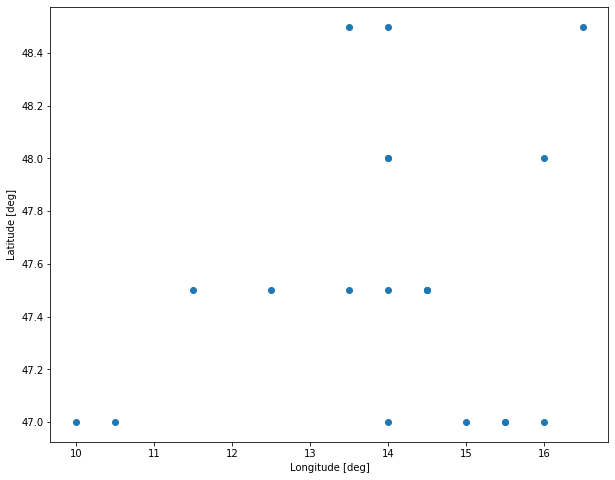

In [22]:
plt.plot(country_points['Austria_longitude'], country_points['Austria_latitude'], 'o')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]');

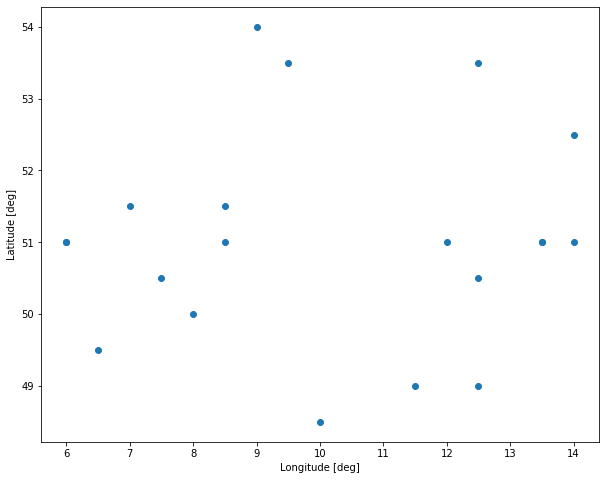

In [23]:
plt.plot(country_points['Germany_longitude'], country_points['Germany_latitude'], 'o')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]');

### Calculate mean temperature deviation for grid points

In [24]:
def calc_country_temperature(country):
    country_temperature = temperatures.sel(
        longitude=country_points[f'{country}_longitude'],
        latitude=country_points[f'{country}_latitude']).mean(dim=['longitude', 'latitude'])
    return country_temperature

In [25]:
temperature_at = calc_country_temperature('Austria')

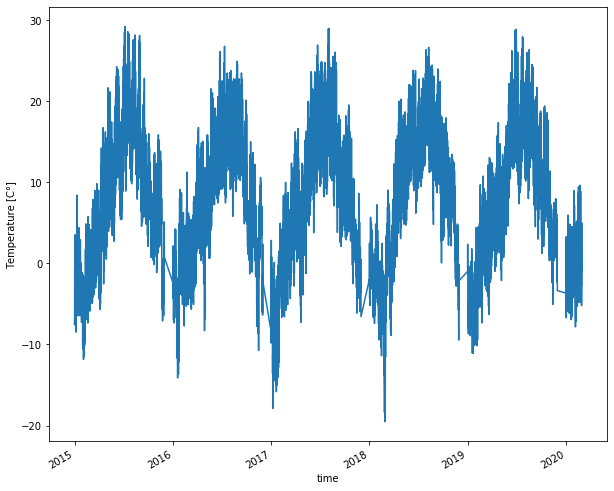

In [26]:
temperature_at.plot()

In [98]:
mean_temperatures.groupby(mean_temperatures)

<xarray.DataArray 't2m' (time: 41545)>
array([-7.318767  , -7.58365   , -7.545691  , ..., -0.77194405,
       -0.82009226, -0.91648674], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-01-01T01:00:00 ... 2020-03-01

# Who likes to have it warm?

In [37]:
def plot_power_vs_temperatur(country):
    power_demand_hourly = get_hourly_country_data(power_demand, country)["2015-01-01":"2019-12-31"]
    
    country_temperature = calc_country_temperature(country)

    idcs = (power_demand_hourly.index.weekday == 2) & (power_demand_hourly.index.hour == 9)
    
    plt.plot(country_temperature.interp(time=power_demand_hourly.index[idcs]),
             power_demand_hourly.TotalLoadValue[idcs] / power_demand_hourly.TotalLoadValue[idcs].mean(),
             'o', markersize=3, label=country)
    
    plt.xlabel('Temperature [C°]')
    plt.ylabel('Ratio Load vs Average load [MW]')

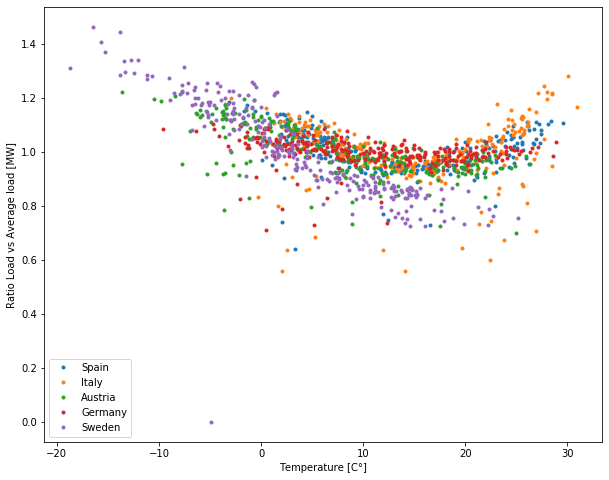

In [38]:
for country in ['Spain', 'Italy', 'Austria', 'Germany', 'Sweden']:
    plot_power_vs_temperatur(country)

plt.legend()

# Use mean temperature deviation as feature for the load model

In [114]:
power_demand_hourly_at = get_hourly_country_data(power_demand, 'Austria')

power_demand_hourly_normal = power_demand_hourly["2015-01-01":"2019-12-31"]
power_demand_hourly_covid = power_demand_hourly["2020-01-01":"2020-05-31"].copy()

In [113]:
X = np.array([power_demand_hourly.index.dayofyear.values,
              power_demand_hourly.index.weekday.values,
              power_demand_hourly.index.hour.values]).T

Y = power_demand_hourly_normal["TotalLoadValue"].values

In [26]:
def extract_features(power_demand_hourly):
    X = np.array([power_demand_hourly.index.dayofyear.values,
                  power_demand_hourly.index.weekday.values,
                  power_demand_hourly.index.hour.values]).T
    return X

def plot_load_prediction_ratio(country):
    """
    """
    print(f"Analyzing load data for '{country}'...")

    power_demand_hourly = get_hourly_country_data(power_demand, country)
    power_demand_hourly_normal = power_demand_hourly["2015-01-01":"2019-12-31"]
    power_demand_hourly_covid = power_demand_hourly["2020-01-01":"2020-05-31"].copy()

    X = extract_features(power_demand_hourly_normal)

    Y = power_demand_hourly_normal["TotalLoadValue"].values

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

    forest = ensemble.RandomForestRegressor()
    forest.fit(X_train, Y_train)

    prediction_train = forest.predict(X_train)
    prediction_test = forest.predict(X_test)
    print(f"{country}: R2 score (training/test): ", r2_score(Y_train, prediction_train),
          "/", r2_score(Y_test, prediction_test))

    X_covid = extract_features(power_demand_hourly_covid)

    prediction_covid = forest.predict(X_covid)

    power_demand_hourly_covid['Prediction'] = prediction_covid

    power_demand_hourly_covid_monthly = power_demand_hourly_covid.resample('1m').mean()

    ratio = power_demand_hourly_covid_monthly.TotalLoadValue / power_demand_hourly_covid_monthly.Prediction
    ratio.plot(label=country)